In [1]:
dataset_path = '../Datasets/DL/Jute_Pest_Dataset'

In [2]:
import tensorflow as tf

directory = '../Datasets/DL/Jute_Pest_Dataset/train'

# Create the dataset with label_mode='int'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',  # Labels will be integers (e.g., 0, 1, 2)
    image_size=(256, 256),
    shuffle=True,
    batch_size=32,
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=123
)

# You can access the class names (inferred from subdirectories) like this:
class_names = train_ds.class_names
print("Class names:", class_names)
directory = '../Datasets/DL/Jute_Pest_Dataset/test'

# Create the dataset with label_mode='int'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',  # Labels will be integers (e.g., 0, 1, 2)
    image_size=(256, 256),
    shuffle=True,
    batch_size=32,
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=123
)

# You can access the class names (inferred from subdirectories) like this:
class_names = test_ds.class_names
print("Class names:", class_names)

Found 6443 files belonging to 17 classes.
Using 1288 files for validation.
Class names: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']
Found 379 files belonging to 17 classes.
Using 75 files for validation.
Class names: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']


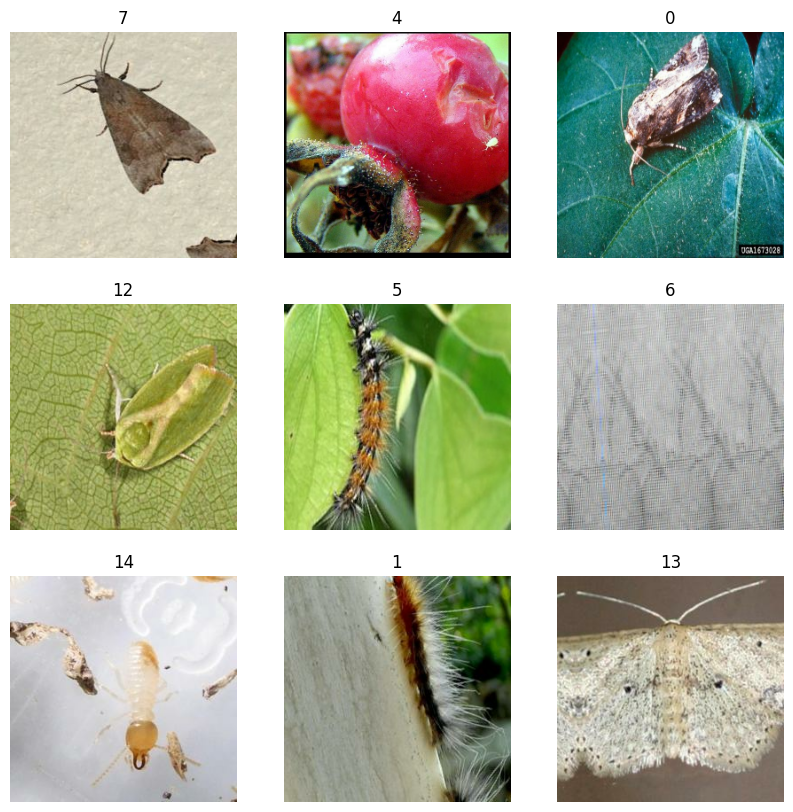

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
from keras import layers, models 
import keras

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),

    layers.Conv2D(256, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (2, 2), activation='relu'),
    
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])

c:\Users\HP\Desktop\DATA\QUASTECH\ds-notes\venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
# model.fit(train_ds, epochs = 5,
#           callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
#           validation_data = test_ds)

In [8]:
import pickle as pk
with open('models/pest_cnn.pkl', 'rb') as file:
    model = pk.load(file)

In [10]:
model.predict(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step


array([[1.14001632e-04, 5.98569870e-01, 1.24942511e-03, ...,
        1.22091937e-04, 3.16606134e-01, 8.42643261e-04],
       [1.32612405e-16, 3.25997651e-09, 6.00485828e-10, ...,
        4.63122466e-12, 2.52100408e-01, 2.26749449e-16],
       [1.74686277e-18, 1.13177578e-07, 2.85840719e-18, ...,
        1.09817734e-20, 1.39313061e-09, 1.62116031e-16],
       ...,
       [2.28366339e-08, 7.08309487e-02, 2.79461892e-06, ...,
        1.35624845e-07, 4.23201855e-04, 2.20394185e-07],
       [1.74706645e-06, 4.32844482e-10, 2.88298357e-12, ...,
        6.25027265e-13, 4.47408860e-10, 9.23676975e-03],
       [3.26822978e-08, 7.95112064e-05, 3.86427033e-08, ...,
        6.27367342e-07, 1.64378234e-05, 4.00049799e-10]],
      shape=(75, 17), dtype=float32)